# PROJETO I 
## Processamento Digital de Imagens


### Questão 1: 
Conversão RGB-YIQ-RGB.


In [1]:
import colorsys
# !pip install opencv-python
import cv2
from matplotlib.pyplot import imshow
from PIL import Image

In [2]:
# Vetores a serem utilizados
coresRGB_antes = []
coresYIQ = []
coresRGB_depois =[]

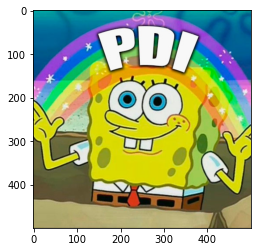

In [3]:
# Imagem escolhida
image = Image.open("bob.jpg")
imshow(image)

In [4]:
def matrizRGB(image, coresRGB):
    linha = []
    count = 0
    for cor_rgb in image.getdata():   #Pega o valor RGB de cada pixel
        linha.append(cor_rgb)
        if(count == image.size[0] - 1):
            coresRGB.append(linha)
            count = -1
            linha = []
        count += 1
    return coresRGB

In [5]:
matrizRGB(image, coresRGB_antes)

print()

In [6]:
#Função que converte RBG para YIQ
def RGB2YIQ (r,  g, b):
    y = 0.299*r + 0.587*g + 0.114*b
    i = 0.596*r - 0.274*g - 0.322*b
    q = 0.211*r - 0.523*g + 0.312*b
    return (round(y,2), round(i,2), round(q,2))

In [7]:
#Função que converte YIQ para RGB
def YIQ2RGB (y,  i, q):
    r = 1.0*y + 0.956*i + 0.621*q
    g = 1.0*y - 0.272*i - 0.647*q
    b = 1.0*y - 1.106*i + 1.703*q
    return (round(r,2),  round(g,2), round(b,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


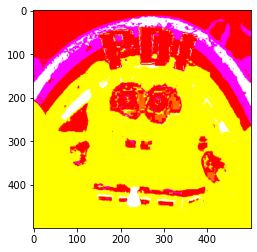

In [8]:
for linha in coresRGB_antes:   #transformando em YIQ
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        y, i, q = RGB2YIQ(r, g, b)
        vetor.append((y,i,q))
        
    coresYIQ.append(vetor)
    
imshow(coresYIQ)

In [9]:
def RGBRound(r, g, b):
    if r < 0.0:
        r = 0.0
    if g < 0.0:
        g = 0.0
    if b < 0.0:
        b = 0.0
    if r > 255:
        r = 255
    if g > 255:
        g = 255
    if b > 255:
        b = 255

    return (r, g, b)

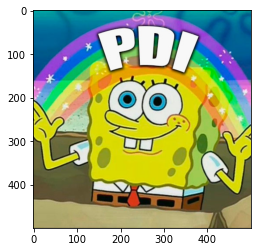

In [10]:
#transformando de volta para RGB
for linha in coresYIQ:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]
        
        r, g, b = YIQ2RGB(y, i, q)
        r, g, b = RGBRound(r, g, b)
        r, g, b = int(round(r)), int(round(g)), int(round(b))
        
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    coresRGB_depois.append(vetor)
imshow(coresRGB_depois)

In [11]:
#verificando se as imagens são iguais
def verifica_imagens(antes, depois):
    if antes == depois:     
        print('Imagens convertidas com sucesso')
    else:
        print('Imagens diferentes')

In [12]:
verifica_imagens(coresRGB_antes, coresRGB_depois)

Imagens convertidas com sucesso


### Questão 2
Negativo. Duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB.

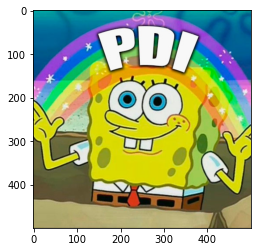

In [13]:
image_2 = []
matrizRGB(image, image_2)
imshow(image)

In [14]:
def RGB_negativo(image_2):
    coresNegativo = []
    for linha in image_2:    #passando para negativo
        vetor = []
        for rgb in linha:
            r = 255 - rgb[0]
            g = 255 - rgb[1]
            b = 255 - rgb[2]
            rgb2 = (r,g,b)
            vetor.append(rgb2)
        coresNegativo.append(vetor)
    return coresNegativo

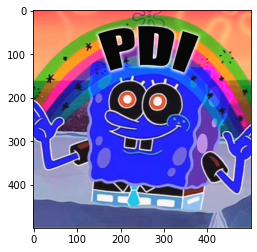

In [15]:
imagem_negativa = RGB_negativo(image_2)

imshow(imagem_negativa)

In [16]:
#Conversão na banda Y
def conversor_banda_y (r,  g, b):
    y = 0.30*r + 0.59*g + 0.11*b
    i = 0.74*(r-y) - 0.27*(b-y)
    q = 0.48*(r-y) + 0.41*(b-y)
    return (y, i, q)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


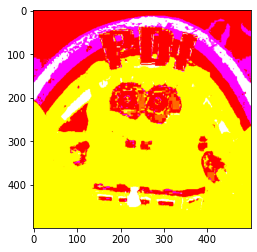

In [17]:
coresYIQ = []

#transformando em YIQ
for linha in image_2:   
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        y, i, q = conversor_banda_y(r, g, b)
     
        vetor.append((y,i,q))
    coresYIQ.append(vetor)
    
imshow(coresYIQ)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


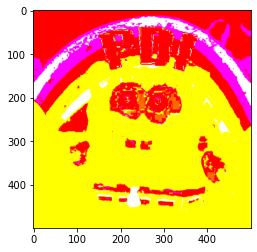

In [18]:
coresNegYIQ = []

# Transformando em negativo
for linha in coresYIQ:    
    vetor = []
    for yiq in linha:
        y = 255 - yiq[0] 
        yiq2 = (y,yiq[1],yiq[2])
        vetor.append(yiq2)
    coresNegYIQ.append(vetor)
    
imshow(coresNegYIQ)

In [19]:
verifica_imagens(coresYIQ, coresNegYIQ)

Imagens diferentes


In [20]:
#Conversor banda Y negativa para RGB
def conversor_banda_y_rgb (y, i, q):
    r = y + 0.9468822170900693*i + 0.6235565819861433*q
    g = y - 0.27478764629897834*i - 0.6356910791873801*q
    b = y - 1.1085450346420322*i + 1.7090069284064666*q
    
    return (r, g, b)

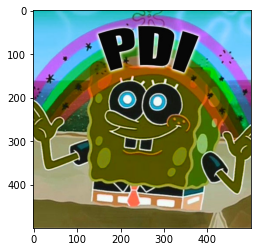

In [21]:
coresRGB3=[]
for linha in coresNegYIQ:    #transformando de volta para RGB
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]
        
        r, g, b = conversor_banda_y_rgb(y, i, q)
        r, g, b = RGBRound(r, g, b)
        r, g, b = int(round(r)),int(round(g)), int(round(b))
        
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    coresRGB3.append(vetor)
imshow(coresRGB3)

### Questão 3
Correlação m x n sobre R, G e B, com offset, e filtro especificado em um arquivo (txt) a parte. Testar com filtros Média, Prewitt e Emboss e explicar os resultados. Para visualização, utilize valor absoluto seguido por expansão de histograma para [0, 255].


In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
import time 
import numpy as np

In [23]:
def Matriz(linhas,colunas,flag):
    if(flag == 1):
        #define linhas e colunas da mascara
        linhas = 15
        colunas = 15
        mask = np.zeros((linhas,colunas))
        for i in range(colunas):
            for t in range(linhas):
                mask[i][t] = 1/(linhas*colunas)
    else:
        mask = np.array([[-1,-2,-1],
                         [0,0,0],
                         [1,2,1]])

    return mask

In [24]:
def Correlation(img,a,c,mask):
    img_corr = np.zeros(img.shape, 'uint8')
    height = img.shape[0]
    width = img.shape[1]
    h,w = mask.shape
    init = time.time()
    for i in range(a, height + a):
        for j in range(c, width + c):
            sumR = 0
            sumG = 0
            sumB = 0
            if(c <= width and a <= height ):
                if(a!=0 and c !=0):
                    for m in range(h):
                        for n in range(w):
                            sumR += np.multiply(mask[m, n], newR[i+m-a, j-c+n])
                            sumG += np.multiply(mask[m, n], newG[i-a+m, j-c+n])
                            sumB += np.multiply(mask[m, n], newB[i-a+m, j-c+n])
                elif (a == 0):
                    for m in range(h):
                        for n in range(w):
                            sumR += np.multiply(mask[m, n], newR[i, j-c+n])
                            sumG += np.multiply(mask[m, n], newG[i, j-c+n])
                            sumB += np.multiply(mask[m, n], newB[i, j-c+n])
                elif (c == 0):
                    for m in range(h):
                        for n in range(w):
                            sumR += np.multiply(mask[m, n], newR[i+m-a, j])
                            sumG += np.multiply(mask[m, n], newG[i-a+m, j])
                            sumB += np.multiply(mask[m, n], newB[i-a+m, j])
                
                if sumR < 0:
                    sumR = -sumR
                elif sumR > 255:
                    sumR = 255
                if sumG < 0:
                    sumG = -sumG
                elif sumG > 255:
                    sumG = 255
                if sumB < 0:
                    sumB = -sumB
                elif sumB > 255:
                    sumB = 255
                
            img_corr[i - a, j - c, 0] = sumR
            img_corr[i - a , j - c, 1] = sumG
            img_corr[i - a, j - c, 2] = sumB
    
    fim = time.time()
    print(fim-init)
    return img_corr

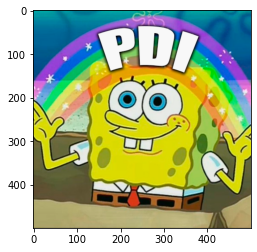

In [25]:
#abertura da imagem
img = Image.open('bob.png')
img = np.array(img)
imshow(img)

In [26]:
#altura e largura da imagem
height = img.shape[0]
width = img.shape[1]


mask = Matriz(15,15,0) 
    
h,w = mask.shape

a = h //2
c = w//2

In [27]:
#Quando se faz a extensão por zero é preciso adicionar exatemente a metade da altura e da largura arredondado
# para baixo a matriz original    
newR = np.zeros((height+(2*a), width+(2*c)))
newG = np.zeros((height+(2*a), width+(2*c)))
newB = np.zeros((height+(2*a), width+(2*c)))

In [28]:
#preenchimento das novas matrizes RGB
for i in range(height):
    for j in range(width):
        if(i<height and j < width ):
            newR[i +a][j+c] = img[i,j,0]
                
            newG[i +a][j+c] = img[i,j,1]  
            newB[i +a][j+c] = img[i,j,2]     
    # garantia que a mascara percorra sem passar pelas extremidades
#preenchimento do filtro media

In [29]:
teste = Correlation(img,a,c,mask)

15.879041194915771


In [30]:
output = Image.fromarray(teste)

flag = 0
if(flag == 1):
    output.save('./output/media.png')
else:
    output.save('./output/sobel.png')
output.show()


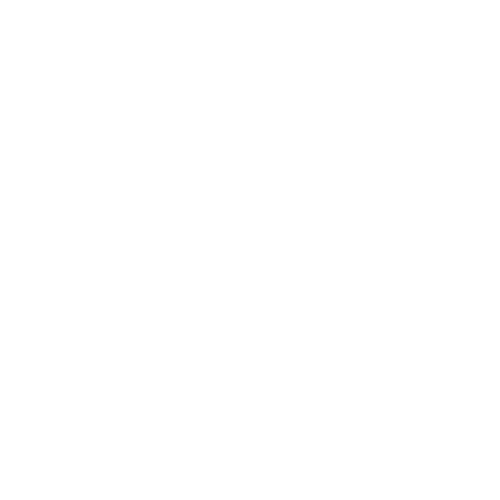

In [31]:
output